# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [2]:
path ='../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361


In [3]:
X = data.iloc[:,28:43921  ] 
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6:
        Y.append(1)
    else:
        Y.append(2)# If PFS is over 3 months, I will consider it as Responder (R)

X

,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,21.038652,35.199603,30.187983,22.999432,33.643965,37.130851,22.705126,22.869853,21.076515,21.271282,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,21.038652,38.183943,30.483638,25.581769,28.866645,37.945043,27.797609,24.142100,21.076515,21.271282,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,21.038652,37.141292,30.092851,26.933385,26.684228,36.851946,22.705126,30.406352,21.076515,21.271282,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,21.038652,36.447015,30.975010,26.683128,32.521495,38.453517,26.337846,28.229357,21.076515,21.271282,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,21.038652,37.623923,26.915750,22.999432,23.219176,38.931987,22.705126,22.869853,21.076515,21.271282,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,21.038043,36.338729,30.954407,27.310879,26.161567,38.376185,25.971821,24.438322,21.076088,21.056491,...,31.62442,30.78532,30.86517,30.92600,31.53239,23.65585,32.42073,34.41045,33.21697,32.22166
177,21.038043,38.248915,33.110149,26.793199,26.161567,36.537388,26.388265,24.438322,21.076088,21.056491,...,31.40147,31.50200,29.96535,30.21446,31.49627,28.04168,32.19568,32.69615,32.18970,32.59554
178,21.038043,35.884812,32.880283,25.659842,31.822942,38.265866,26.504307,24.438322,21.076088,21.056491,...,31.21094,30.91066,31.35764,30.99788,31.45772,23.65585,32.36832,35.02409,34.26388,32.82148
179,21.038043,35.283776,30.658715,27.533890,32.930512,36.882090,26.303147,24.438322,21.076088,21.056491,...,31.12324,28.76312,31.48891,30.27351,32.88316,23.65585,31.76924,34.07224,34.35116,31.98965


### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.15, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 153
Target column size of the training set: 153
Test set size: 28
Target column size of the test set: 28


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, min_samples_leaf=3, n_estimators=20,
                       random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5232258064516129


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [10]:
print('Final accuracy on the training dataset: ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset: 1.0
Final accuracy on the testing dataset: 0.35714285714285715


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[69  0  0]
 [ 0 28  0]
 [ 0  0 56]]
Input data:  [2 0 0 2 0 0 2 2 2 0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 0 2 0 0 0 2 1 0 0 2 2 0 1
 0 0 1 1 0 2 1 0 1 2 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0
 2 2 2 0 2 0 2 0 2 2 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2 2 0 0 2 2 2 2 0 0 0 2 0
 2 0 0 0 0 1 0 2 0 2 0 2 1 0 0 0 0 1 2 2 0 2 0 2 2 0 1 2 0 1 2 0 0 2 2 1 2
 1 2 2 0 0]
Prediction:        [2 0 0 2 0 0 2 2 2 0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 0 2 0 0 0 2 1 0 0 2 2 0 1
 0 0 1 1 0 2 1 0 1 2 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0
 2 2 2 0 2 0 2 0 2 2 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2 2 0 0 2 2 2 2 0 0 0 2 0
 2 0 0 0 0 1 0 2 0 2 0 2 1 0 0 0 0 1 2 2 0 2 0 2 2 0 1 2 0 1 2 0 0 2 2 1 2
 1 2 2 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        56

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[9 1 6]
 [1 0 2]
 [7 1 1]]
Input data:  [1 0 0 2 2 1 0 2 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 2]
Prediction:        [2 1 0 0 0 2 0 2 0 0 2 2 0 2 0 2 0 0 0 0 0 0 2 0 2 0 0 1]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.00      0.00      0.00         3
           2       0.11      0.11      0.11         9

    accuracy                           0.36        28
   macro avg       0.21      0.22      0.22        28
weighted avg       0.34      0.36      0.35        28



Features with relevance over 0:  449
Features with relevance over 0.04:  0


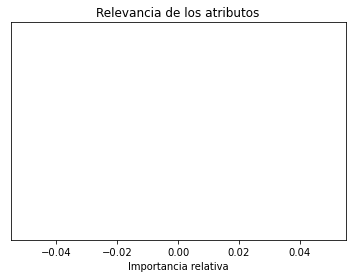

5S_rRNA = 0.0
7SK = 0.0
A1BG = 0.0
A1BG-AS1 = 0.0
A1CF = 0.0
A2M = 0.0
A2M-AS1 = 0.0
A2ML1 = 0.0
A2ML1-AS1 = 0.0
A2MP1 = 0.0
A3GALT2 = 0.0
A4GALT = 0.0
A4GNT = 0.0
AAAS = 0.0
AACS = 0.0
AACSP1 = 0.0
AADAC = 0.0
AADACL2 = 0.0
AADACL2-AS1 = 0.0
AADACL3 = 0.0
AADACL4 = 0.0
AADACP1 = 0.0
AADAT = 0.0
AAED1 = 0.0
AAGAB = 0.0
AAK1 = 0.0
AAMDC = 0.0
AAMP = 0.0
AANAT = 0.0
AAR2 = 0.0
AARD = 0.0
AARS = 0.0
AARS2 = 0.0
AARSD1 = 0.0
AASDH = 0.0
AASDHPPT = 0.0
AASS = 0.0
AATBC = 0.0
AATK = 0.0
AATK-AS1 = 0.0
AB015752.3 = 0.0
AB019438.66 = 0.0
AB019441.29 = 0.0
ABAT = 0.0
ABCA1 = 0.0
ABCA10 = 0.0
ABCA11P = 0.0
ABCA12 = 0.0
ABCA13 = 0.0
ABCA17P = 0.0
ABCA2 = 0.0
ABCA3 = 0.0
ABCA4 = 0.0
ABCA5 = 0.0
ABCA6 = 0.0
ABCA7 = 0.0
ABCA8 = 0.0
ABCA9 = 0.0
ABCA9-AS1 = 0.0
ABCB1 = 0.0
ABCB10 = 0.0
ABCB10P3 = 0.0
ABCB10P4 = 0.0
ABCB11 = 0.0
ABCB4 = 0.0
ABCB5 = 0.0
ABCB6 = 0.0
ABCB7 = 0.0
ABCB8 = 0.0
ABCB9 = 0.0
ABCC1 = 0.0
ABCC10 = 0.0
ABCC11 = 0.0
ABCC12 = 0.0
ABCC13 = 0.0
ABCC2 = 0.0
ABCC3 = 0.0
ABCC4 = 0.0
ABCC

In [15]:
# Mediante el modelo creado podemos ver qué atributos son los más significativos para toamr una decisión.
# Los atributos conmyor relevancia serán los que estén colocados en la cima del árbol.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.04), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.04: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)
# Los atributos que cuya relevancia es 0, no serán necesarios para realizar la predicción del target.